# My Version

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras 
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten, Dense

import os
print(os.listdir("../input"))



Using TensorFlow backend.


['test1', 'train', 'sampleSubmission.csv']


In [2]:
Train = os.listdir('../input/train/train')
name=['Cat','Dog']
lis = []
for i in Train:
    if i[0:3]=='cat':
        lis.append(0)
    else:
        lis.append(1)

labels_train = np.array(lis[0:20000])
labels_val = np.array(lis[20000:])

In [3]:
data_train = np.array([cv2.resize(cv2.imread('../input/train/train/'+i),(128,128))/255.0 for i in Train[0:20000] ],dtype=np.float32)
data_valid = np.array([cv2.resize(cv2.imread('../input/train/train/'+i),(128,128))/255.0 for i in Train[20000:25000] ],dtype=np.float32)


In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
history = model.fit(data_train,labels_train,validation_data=(data_valid,labels_val),batch_size=15,epochs=20)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 16s 818us/step - loss: 0.6242 - acc: 0.6400 - val_loss: 0.5292 - val_acc: 0.7444
Epoch 2/20
20000/20000 [==============================] - 14s 697us/step - loss: 0.5073 - acc: 0.7495 - val_loss: 0.5231 - val_acc: 0.7520
Epoch 3/20
20000/20000 [==============================] - 14s 695us/step - loss: 0.4467 - acc: 0.7909 - val_loss: 0.4361 - val_acc: 0.8020
Epoch 4/20
20000/20000 [==============================] - 14s 694us/step - loss: 0.4112 - acc: 0.8128 - val_loss: 0.4227 - val_acc: 0.8192
Epoch 5/20
20000/20000 [==============================] - 14s 692us/step - loss: 0.3774 - acc: 0.8308 - val_loss: 0.4084 - val_acc: 0.8264
Epoch 6/20
20000/20000 [==============================] - 14s 688us/step - loss: 0.3486 - acc: 0.8450 - val_loss: 0.4513 - val_acc: 0.7990
Epoch 7/20
20000/20000 [==============================] - 14s 690us/s

In [8]:
his = history.history
n = range(len(his['acc']))

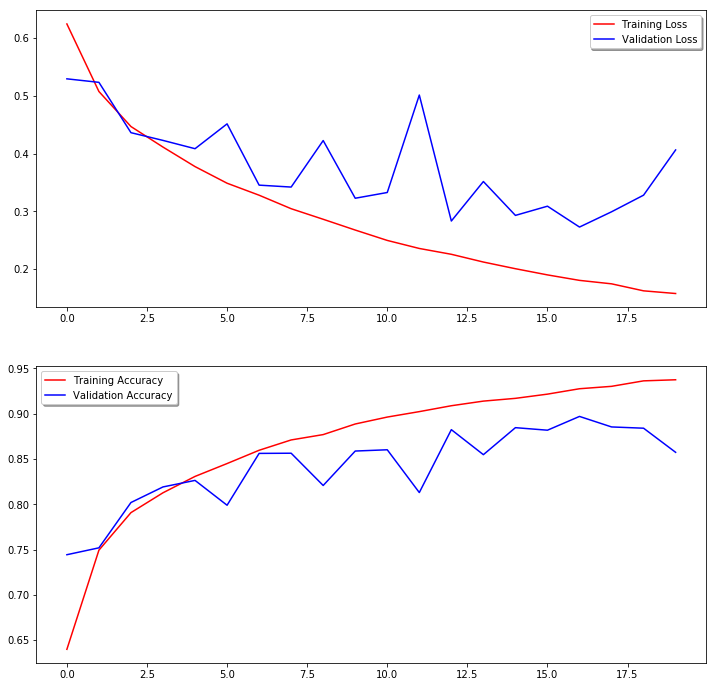

In [9]:
fig,axs = plt.subplots(2,1,figsize=(12,12))
axs[0].plot(n,his['loss'],color='r',label='Training Loss')
axs[0].plot(n,his['val_loss'],color='b',label='Validation Loss')
axs[0].legend(loc='best', shadow=True)

axs[1].plot(n,his['acc'],color='r',label='Training Accuracy')
axs[1].plot(n,his['val_acc'],color='b',label='Validation Accuracy')
axs[1].legend(loc='best', shadow=True)


plt.show()

In [10]:
model.save_weights('model.h5')

In [11]:
import gc
del data_train,data_valid
gc.collect()

0

In [12]:
Test = os.listdir('../input/test1/test1')
Testing = np.array([cv2.resize(cv2.imread('../input/test1/test1/'+i),(128,128))/255.0 for i in Test ],dtype=np.float32)


In [13]:
df = pd.read_csv('../input/sampleSubmission.csv')

In [14]:
ev = model.predict(Testing)

In [15]:
ev = ev.reshape(12500,)
ev[ev>=0.5]=1
ev[ev<0.5]=0

In [16]:
df.label = ev

In [17]:
df.head()

,id,label
0,1,1.0
1,2,0.0
2,3,1.0
3,4,0.0
4,5,1.0


In [18]:
df.to_csv('submission.csv')